In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

import datetime


#### Instructions
1. Install .zip folder from this [link](https://catalog.data.gov/dataset/boundaries-zoning-districts-current)
2. Unzip the .zip folder 
3. Move the `.shp` and `.shx` files from the extracted folder to the resources folder
4. Rename the two files as `geo_export_chicago.shp` and `geo_export_chicago.shx`

In [3]:
map = gpd.read_file('../resources/geo_export_chicago.shp')

<Axes: >

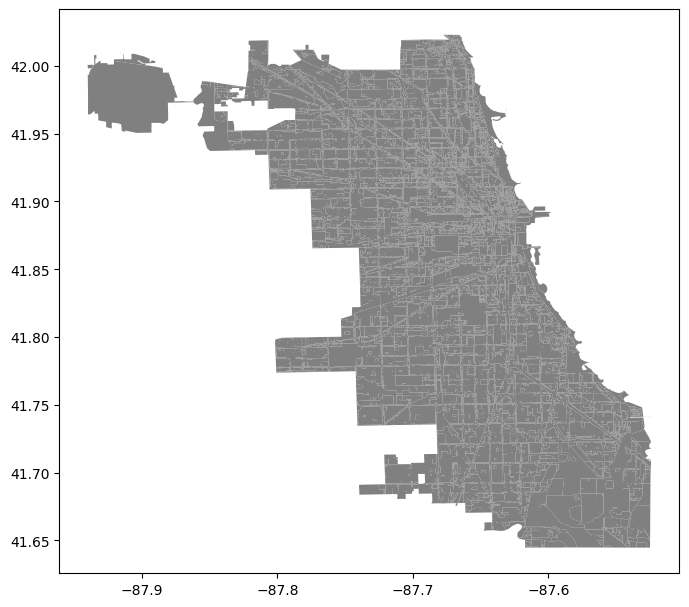

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
map.plot(ax=ax, color="gray")

<Axes: >

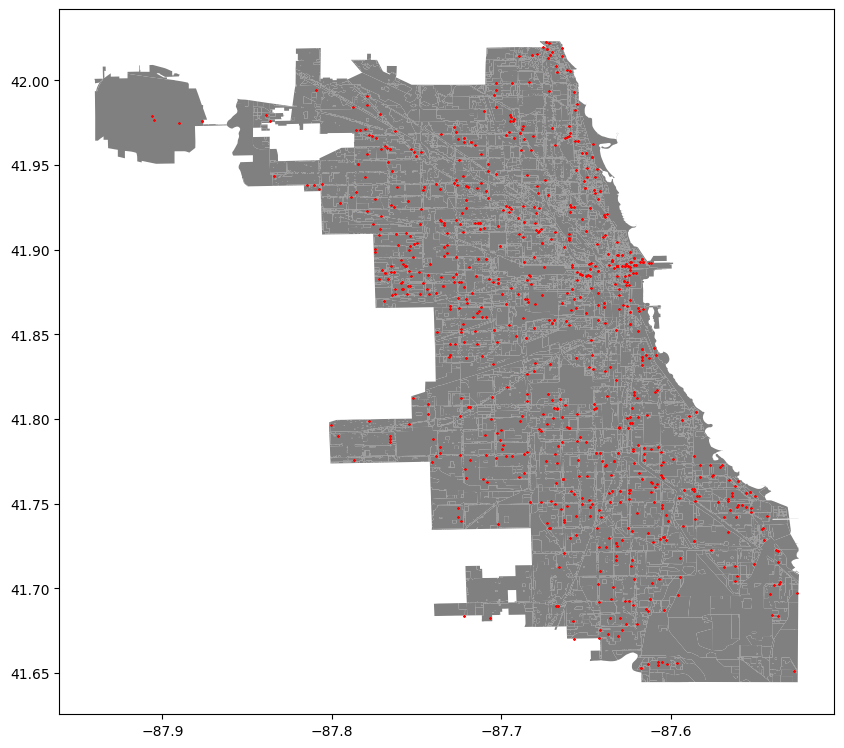

In [57]:
df = pd.read_csv('../src/data/ChicagoCrime_cleaned.csv')
mask = (df['Date'] > '2023-1-1') & (df['Date'] <= str(datetime.date.today()))
df = df.loc[mask]

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

geo_df = gpd.GeoDataFrame(df, #specify our data
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

fig, ax = plt.subplots(figsize=(10,10))
map.plot(ax=ax, color='gray')
geo_df.plot(ax=ax, marker="*", color="red", markersize=1)

References:
1. https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
2. https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates